# Multi-Output model using Keras Functional API

The **[Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)** from the **UCI machine learning repository** has separate datasets for red wine and white wine.

Normally, the wines are classified into one of the quality ratings specified in the attributes. Here, we will combine the two datasets to predict the wine quality and whether the wine is red or white solely from the attributes.

You will model wine quality estimations as a regression problem and wine type detection as a binary classification problem.


- Wine Quality estimation - Regression problem (Number)
- Wine Type estimation - Classification problem (Classify into white or red)

## Initial imports

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load the datasets

1. white wine dataset
2. red wine dataset

### Preprocess the datasets
We will add a new column named `is_red` in your dataframe to indicate if the wine is white or red.
- In the white wine dataset, we will fill the column `is_red` with  zeros (0).
- In the red wine dataset, we will fill the column `is_red` with  ones (1).

In [4]:
# Read the white wine quality dataset
white_df = pd.read_csv("./sample_data/wine_quality/winequality-white.csv", delimiter=";")
print(white_df.columns)

white_df["is_red"] = 0
white_df.drop_duplicates(keep='first', inplace=True)
print(white_df.columns)

white_df.head()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'is_red'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0


In [5]:
red_df = pd.read_csv("./sample_data/wine_quality/winequality-red.csv", delimiter=";")
print(red_df.columns)

red_df["is_red"] = 1
red_df.drop_duplicates(keep="first", inplace=True)
print(red_df.columns)

red_df.head()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'is_red'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


## Concatenate the dataset

In [6]:
df = pd.concat([red_df, white_df], ignore_index=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [7]:
print(f"Length of red wine dataset: {len(red_df)}")
print(f"Length of white wine dataset: {len(white_df)}")
print(f"\nFinal dataset length: {len(df)}")

Length of red wine dataset: 1359
Length of white wine dataset: 3961

Final dataset length: 5320


### Shuffle the data

Important step in any real-world scenario

In [8]:
# np.random.permutation - Creates a randomly shuffled list of indices
# df.iloc - Rearranges the dataset according to the permutation

df = df.iloc[np.random.permutation(len(df))]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
3687,6.3,0.25,0.22,3.3,0.048,41.0,161.0,0.99256,3.16,0.50,10.5,6,0
1059,8.3,0.56,0.22,2.4,0.082,10.0,86.0,0.99830,3.37,0.62,9.5,5,1
1679,7.3,0.20,0.44,1.4,0.045,21.0,98.0,0.99240,3.15,0.46,10.0,7,0
770,8.3,0.31,0.39,2.4,0.078,17.0,43.0,0.99444,3.31,0.77,12.5,7,1
1021,7.9,0.58,0.23,2.3,0.076,23.0,94.0,0.99686,3.21,0.58,9.5,6,1


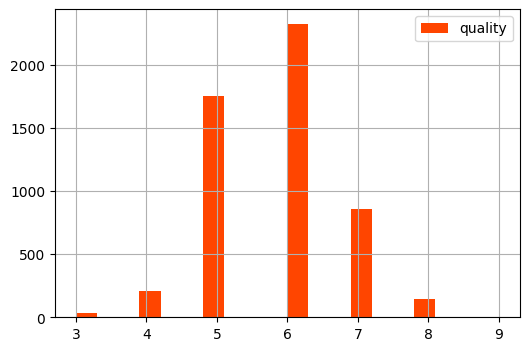

In [9]:
df['quality'].hist(bins=20, color="orangered", figsize=(6,4), legend=True)
plt.show()

## Imbalanced data


- From the graph we can see that the data is imbalanced, the instances of quality 3,4,8 & 9 are far less than that of 5,6 & 7.
- Hence, we can remove the data for wine quality < 5 and > 7

In [10]:
# Get the data where 4 < quality < 8
df = df[(df['quality'] > 4) & (df['quality'] < 8)]

# Reset the index and drop the old ones
df.reset_index(drop=True)
df.shape

(4931, 13)

In [11]:
df['quality'].value_counts()

,count
quality,
6,2323
5,1752
7,856


<Axes: >

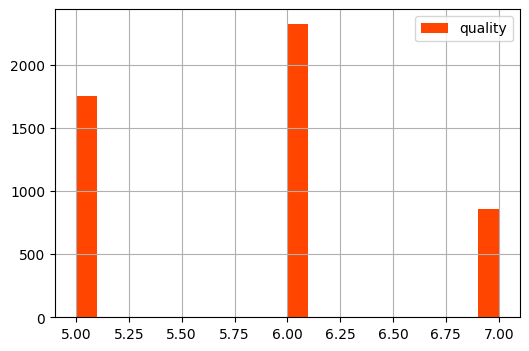

In [12]:
df['quality'].hist(bins=20, color="orangered", figsize=(6,4), legend=True)

## Train test split 80:20

- The training set must be split into 80:20 `train` and `test` sets
- The training set should again be split into `train` and `val` sets

In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.2, random_state=42)

### Dataset stats

In [14]:
train_stats = train.describe()
train_stats.pop("is_red")
train_stats.pop("quality")
train_stats = train_stats.transpose()

In [15]:
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3155.0,7.218811,1.316678,3.80000,6.400000,7.00000,7.7000,15.90000
volatile acidity,3155.0,0.338480,0.161051,0.08000,0.230000,0.29000,0.4000,1.33000
citric acid,3155.0,0.321734,0.147343,0.00000,0.250000,0.31000,0.4000,1.66000
residual sugar,3155.0,5.088891,4.572512,0.70000,1.800000,2.70000,7.5000,65.80000
chlorides,3155.0,0.056902,0.036945,0.01400,0.038000,0.04700,0.0660,0.61100
free sulfur dioxide,3155.0,30.361648,17.133899,1.00000,17.000000,28.00000,41.0000,131.00000
total sulfur dioxide,3155.0,114.461490,56.460368,6.00000,76.000000,117.00000,155.0000,313.00000
density,3155.0,0.994589,0.002981,0.98711,0.992295,0.99479,0.9968,1.03898
pH,3155.0,3.223094,0.159193,2.74000,3.110000,3.21000,3.3250,4.01000
sulphates,3155.0,0.536843,0.152686,0.22000,0.440000,0.51000,0.6000,1.98000


In [16]:
print(f"Total attributes - {len(train.columns)}")

Total attributes - 13


## Separate the labels from the dataset

In [17]:
def format_output(data):
    is_red = data.pop('is_red')
    is_red = np.array(is_red)
    quality = data.pop('quality')
    quality = np.array(quality)
    return (quality, is_red)

In [18]:
train_y = format_output(train)
val_y = format_output(val)
test_y = format_output(test)

In [19]:
train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

## Normalize the data


The normalization formula is as follows -
$$x_{norm} = \frac{x - \mu}{\sigma}$$


In [20]:
# NOTE: We are normalizing the validation and test sets using the mean and standard deviations from the training set

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [21]:
norm_train_x = norm(train)
norm_val_x = norm(val)
norm_test_x = norm(test)

## Define the model

You will add output layers to the base model.
- The model will need two outputs.

One output layer will predict wine quality, which is a numeric value.
- Define a `Dense` layer with 1 neuron.
- Since this is a regression output, the activation can be left as its default value `None`.

The other output layer will predict the wine type, which is either red `1` or not red `0` (white).
- Define a `Dense` layer with 1 neuron.
- Since there are two possible categories, you can use a sigmoid activation for binary classification.

In [22]:
def base_model(inputs):
    x = Dense(128, activation='relu')(inputs)
    x = Dense(128, activation='relu')(x)
    return x

def final_model(inputs):
    x = base_model(inputs)
    wine_quality = Dense(1, name="wine_quality")(x)
    wine_type = Dense(1, activation='sigmoid', name="wine_type")(x)
    model = Model(inputs=[inputs], outputs=[wine_quality, wine_type])

    return model

## Compiling and Training the model

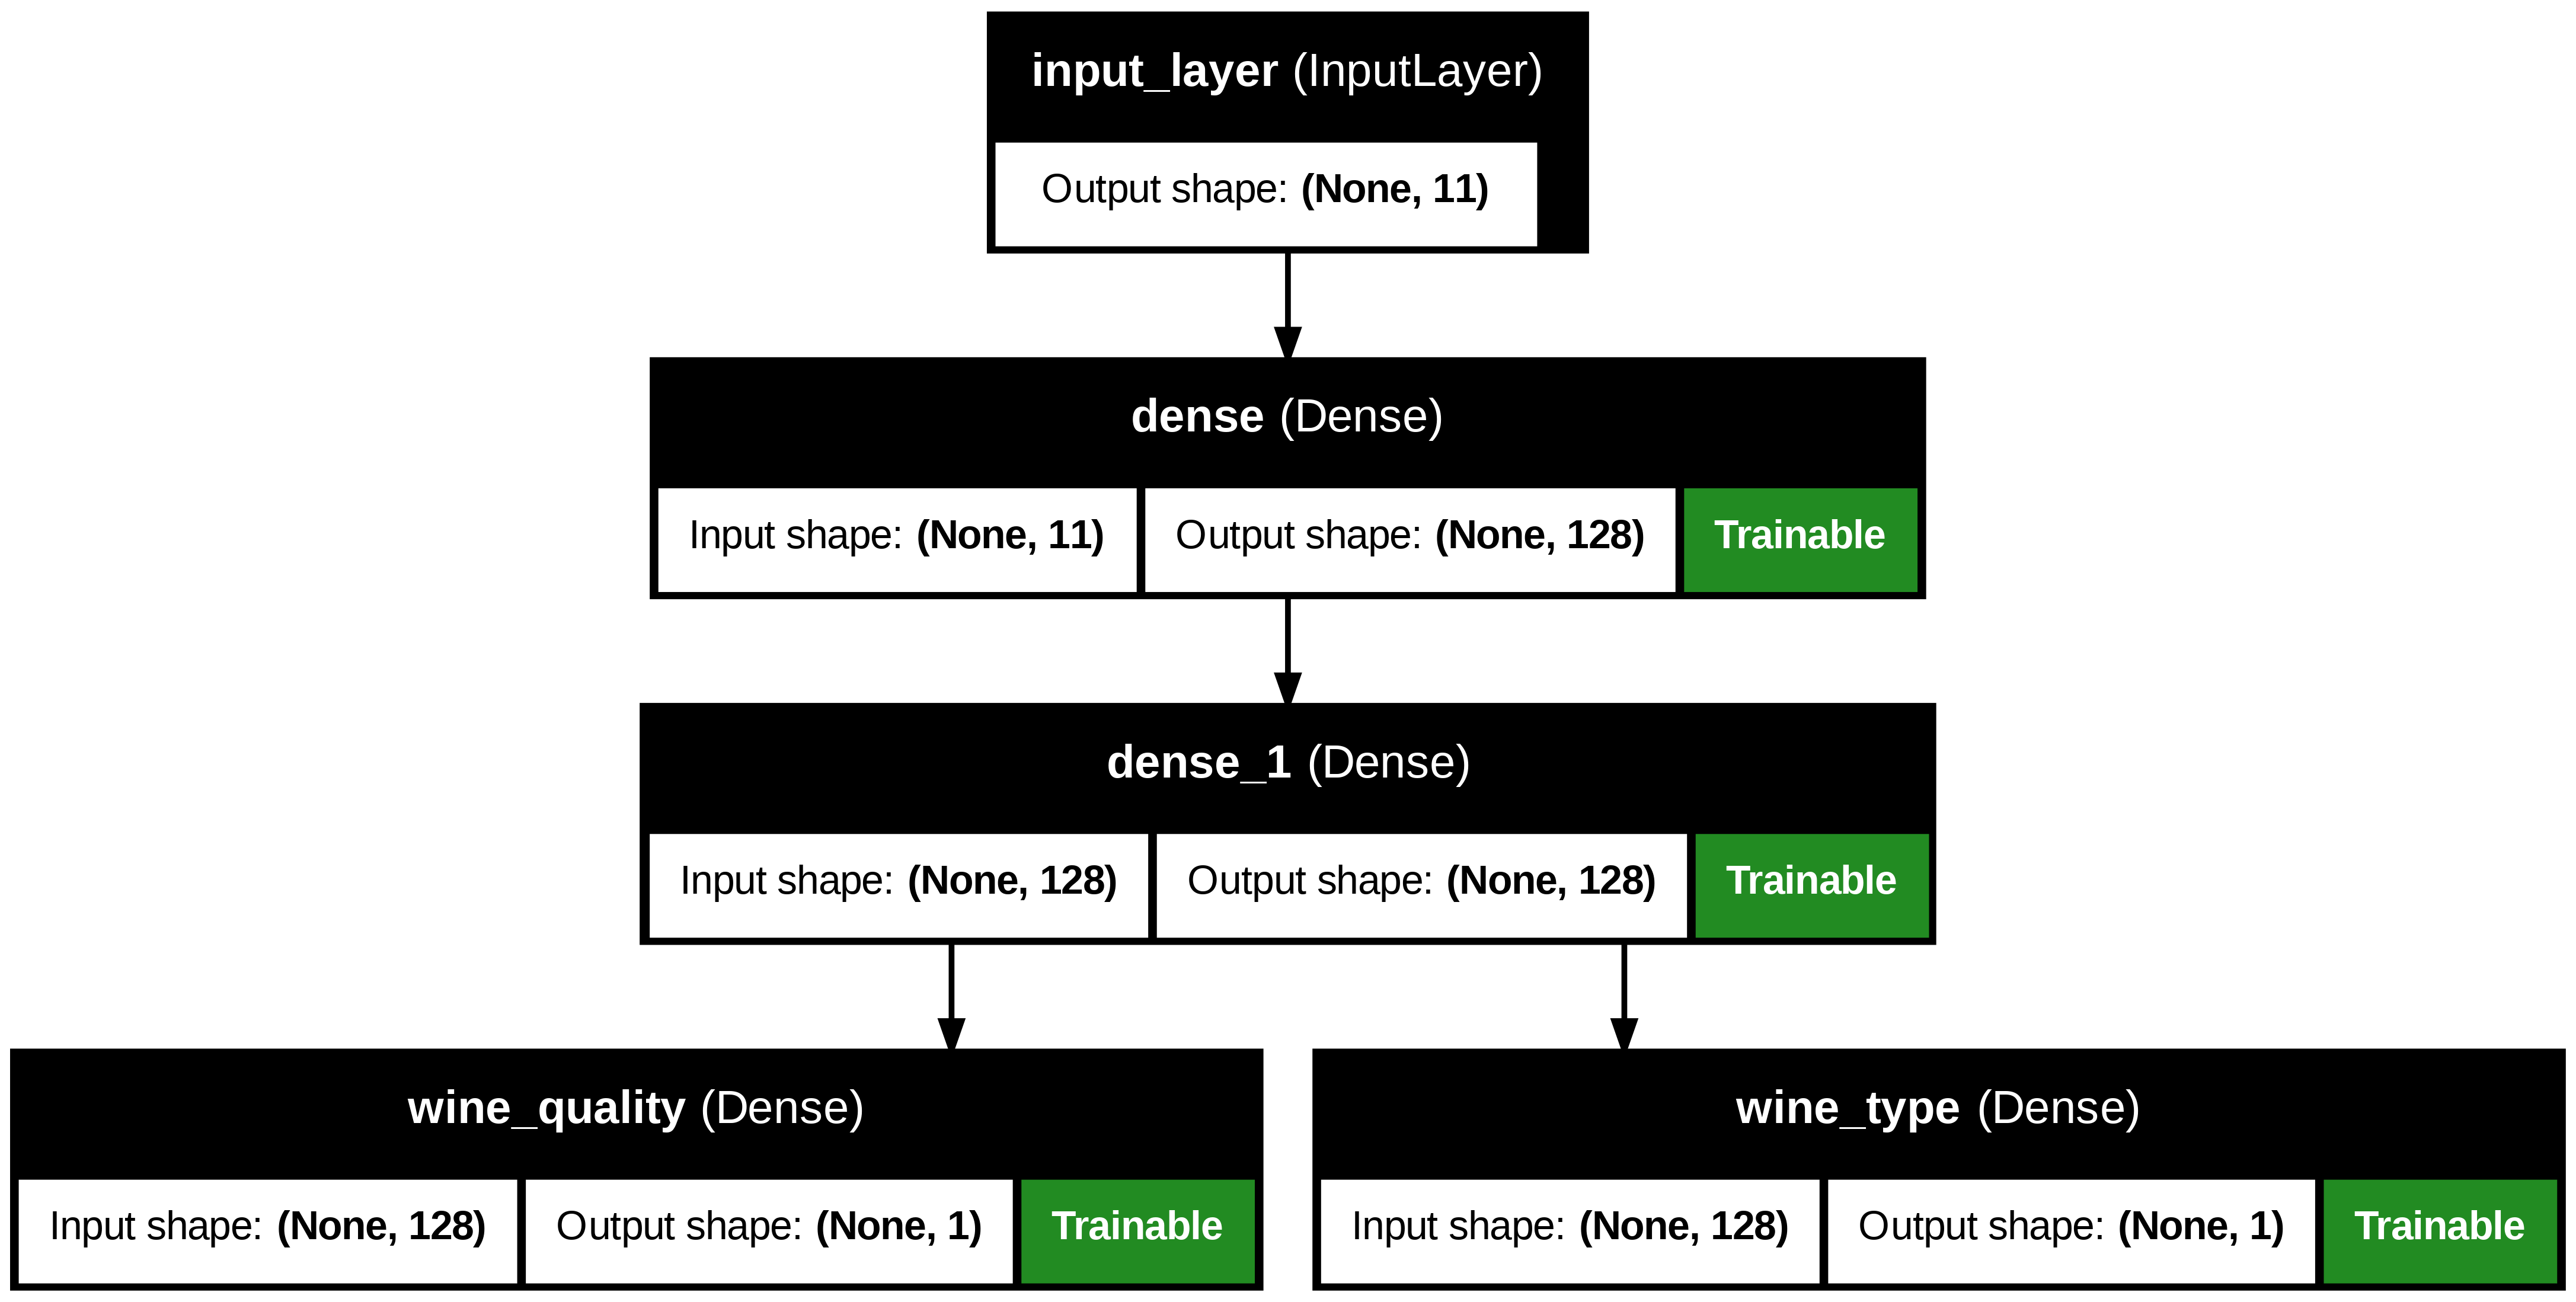

In [23]:
from tensorflow.keras.utils import plot_model

inputs = Input(shape=(11,))
rms = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model = final_model(inputs)

plot_model(model, show_layer_names=True, show_shapes=True, show_trainable=True, dpi=350)

In [24]:
model.compile(optimizer=rms,
              loss={
                  'wine_type':'binary_crossentropy',
                  'wine_quality':'mean_squared_error',
              },
              metrics={
                  'wine_type':'accuracy',
                  'wine_quality':tf.keras.metrics.RootMeanSquaredError(),
              }
            )

In [25]:
history = model.fit(norm_train_x, train_y,
                    validation_data=(norm_val_x, val_y),
                    epochs=40)

Epoch 1/40
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 32.2124 - wine_quality_loss: 31.5492 - wine_quality_root_mean_squared_error: 5.6113 - wine_type_accuracy: 0.6556 - wine_type_loss: 0.6629 - val_loss: 20.8460 - val_wine_quality_loss: 20.2227 - val_wine_quality_root_mean_squared_error: 4.4963 - val_wine_type_accuracy: 0.6933 - val_wine_type_loss: 0.6292
Epoch 2/40
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 17.0776 - wine_quality_loss: 16.4594 - wine_quality_root_mean_squared_error: 4.0526 - wine_type_accuracy: 0.7016 - wine_type_loss: 0.6176 - val_loss: 9.3541 - val_wine_quality_loss: 8.7970 - val_wine_quality_root_mean_squared_error: 2.9648 - val_wine_type_accuracy: 0.7554 - val_wine_type_loss: 0.5640
Epoch 3/40
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.3128 - wine_quality_loss: 6.7584 - wine_quality_root_mean_squared_error: 2.5932 - wine_type_accuracy: 0.7401 - wine_type_loss: 0.5543 - val_loss: 3.6371 - val_wine_quality_loss: 3.1633 - val_wine_quality_root_mean_squ

In [26]:
# Gather the training metrics
loss, wine_quality_loss, wine_type_loss, wine_quality_rmse, wine_type_accuracy = model.evaluate(x=norm_val_x, y=val_y)

print()
print(f'loss: {loss}')
print(f'wine_quality_loss: {wine_quality_loss}')
print(f'wine_type_loss: {wine_type_loss}')
print(f'wine_quality_rmse: {wine_quality_rmse}')
print(f'wine_type_accuracy: {wine_type_accuracy}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4182 - wine_quality_loss: 0.3999 - wine_quality_root_mean_squared_error: 0.6316 - wine_type_accuracy: 0.9977 - wine_type_loss: 0.0185

loss: 0.3981877863407135
wine_quality_loss: 0.37786799669265747
wine_type_loss: 0.021981434896588326
wine_quality_rmse: 0.613239049911499
wine_type_accuracy: 0.9949302673339844


## Analyze the model's performance

In [27]:
predictions = model.predict(norm_test_x)
quality_pred = predictions[0]
type_pred = predictions[1]

print(f"Sample quality prediction - {quality_pred[1]}")
print(f"Sample type prediction - {type_pred[1]}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Sample quality prediction - [5.6061783]
Sample type prediction - [0.00090887]


In [28]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)

    # Plot the normal metrics' values and the validation metrics'
    plt.plot(history.history[metric_name], label=metric_name)
    plt.plot(history.history['val_' + metric_name], label='val_'+metric_name)

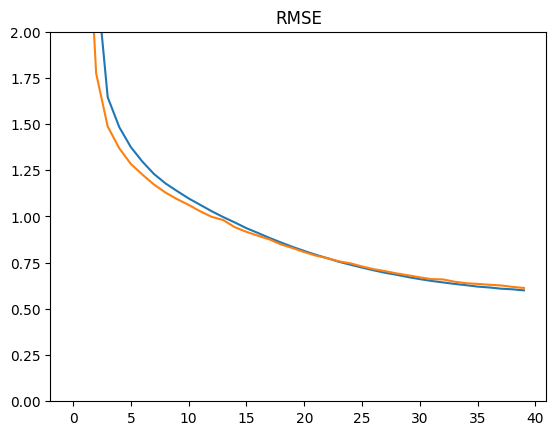

In [29]:
plot_metrics("wine_quality_root_mean_squared_error", 'RMSE', ylim=2)

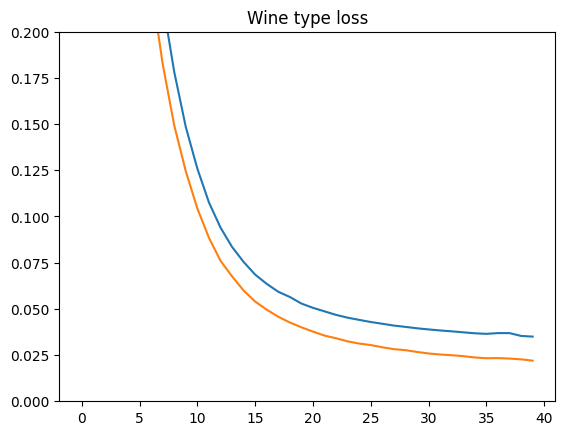

In [30]:
plot_metrics("wine_type_loss", "Wine type loss", ylim=0.2)

### Plots for confusion matrix

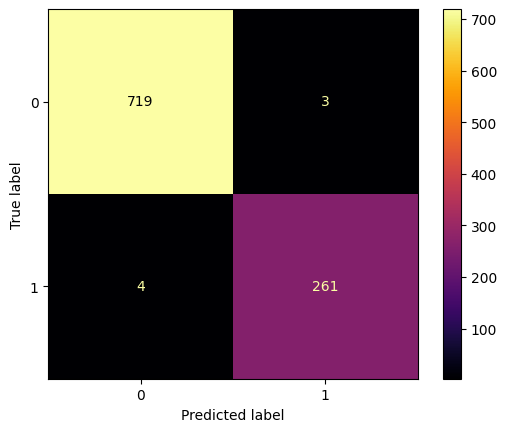

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_y[1], np.round(type_pred), labels=[0,1])
disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
disp.plot(values_format='d', cmap='inferno')
plt.show()